In [2]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files


In [3]:
from google.colab import drive #to import the google drive data

In [4]:
drive.mount('/content/drive')   # to mount the drive data into the colab cloud and enter the activation code

Mounted at /content/drive


In [5]:
cd /content/drive/"My Drive/Colab Notebooks/College Codes/Linear Regression" 

/content/drive/My Drive/Colab Notebooks/College Codes/Linear Regression


In [7]:
coloumnName = ['area','bedroom','price']

In [11]:
dataset = pd.read_csv("ex1data2.txt",names=coloumnName)
dataset.head()

,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [12]:
dataset.shape

(47, 3)

In [13]:
dataset.describe()

,area,bedroom,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [14]:
area_value = dataset['area']


In [15]:
bedroom_value = dataset.iloc[0:dataset.shape[0],1:2]


In [16]:
price_value = dataset.iloc[0:dataset.shape[0],2:3]

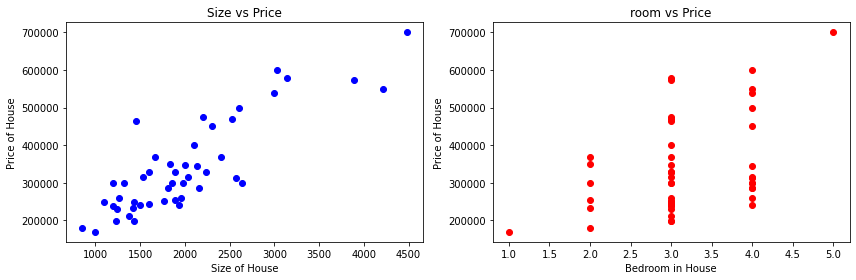

In [17]:
fig,axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)
axes[0].scatter(area_value,price_value,color='b')
axes[0].set_xlabel("Size of House")
axes[0].set_ylabel("Price of House")
axes[0].set_title("Size vs Price")

axes[1].scatter(bedroom_value,price_value,color='r')
axes[1].set_xlabel("Bedroom in House")
axes[1].set_ylabel("Price of House")
axes[1].set_title("room vs Price")

plt.tight_layout()

In [18]:
#feature Normalization
def feature_normalization(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std

    return X_norm,mean,std

In [57]:
data = dataset.values      #dataFrames to array
n = len(data)
X=data[:,0:2].reshape(n,2)
X_norm,mean,std = feature_normalization(X)
X_norm = np.append(np.ones((n,1)),X_norm,axis=1)    

In [28]:
mean

array([2000.68085106,    3.17021277])

In [58]:
X_norm.shape

(47, 3)

In [30]:
Y=data[:,-1].reshape(n,1)

In [31]:
Y

array([[399900],
       [329900],
       [369000],
       [232000],
       [539900],
       [299900],
       [314900],
       [198999],
       [212000],
       [242500],
       [239999],
       [347000],
       [329999],
       [699900],
       [259900],
       [449900],
       [299900],
       [199900],
       [499998],
       [599000],
       [252900],
       [255000],
       [242900],
       [259900],
       [573900],
       [249900],
       [464500],
       [469000],
       [475000],
       [299900],
       [349900],
       [169900],
       [314900],
       [579900],
       [285900],
       [249900],
       [229900],
       [345000],
       [549000],
       [287000],
       [368500],
       [329900],
       [314000],
       [299000],
       [179900],
       [299900],
       [239500]])

In [32]:
theta_array = np.zeros((3,1))

In [33]:
theta_array

array([[0.],
       [0.],
       [0.]])

In [34]:
#defining the Hypothesis    : H(x) = theta0 + theta1*x1 + theta2*x2

def hypothesis(theta_array,x1,x2):      #theta_array = [theta_array[0],theta_array[1],theta_array[2]]
    return theta_array[0]+(theta_array[1]*x1)+(theta_array[2]*x2)

In [35]:
def cost_function(theta_array,x1,x2,y,m):   #x and y are list of observation.
    total_error = 0     #accumulate all the error
    for i in range(m):
        total_error+=(theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i] - y[i])**2

    return total_error/(2*m)

In [36]:
def gradient_descent(theta_array,x1,x2,y,alpha,m):
    summation_theta0 = 0
    summation_theta1 = 0
    summation_theta2 = 0

    for i in range(m):
        summation_theta0+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]) - y[i])
        summation_theta1+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]) - y[i])*x1[i])
        summation_theta1+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]) - y[i])*x2[i])

    new_theta0 = theta_array[0]-alpha*(summation_theta0/m)
    new_theta1 = theta_array[1]-alpha*(summation_theta1/m)
    new_theta2 = theta_array[2]-alpha*(summation_theta2/m)

    updated_theta_array = [new_theta0,new_theta1,new_theta2]
    print(updated_theta_array)
    return updated_theta_array

In [40]:
def training(x1,x2,y,alpha,iters):
    theta_0 = 0
    theta_1 = 0
    theta_2 = 0
    theta_array = [theta_0,theta_1,theta_2]

    m=x1.size                #size of the data set or the number of observation
    cost_function_values = []
    for i in range(iters):
        theta_array = gradient_descent(theta_array,x1,x2,y,alpha,m)     #taking the new theta's
        cost_function_values.append(cost_function(theta_array,x1,x2,y,m))   #taking all the cost function values and storing
        ''' if(i%6==0):
            y_new=x2*theta_array[2]+x1*theta_array[1]+theta_array[0]       #linear regression line
            plt.plot(x1,y_new,'r')
            plt.scatter(x1,y)
            plt.show() '''

    x=np.arange(0,len(cost_function_values),step=1)
    plt.plot(x,cost_function_values,"-b")
    plt.xlabel("number of iteration")
    plt.ylabel("Cost/loss values")
    plt.title("cost Function curve")
    plt.show()

    return theta_array

In [60]:
X_norm

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

[array([3404.12659574]), array([4461.76793067]), 0.0]
[array([6729.59424623]), array([8844.87691608]), 0.0]
[array([9977.97613035]), array([13150.90013513]), 0.0]
[array([13150.81396344]), array([17381.37930315]), 0.0]
[array([16249.61862652]), array([21537.82530116]), 0.0]
[array([19275.87078298]), array([25621.71879255]), 0.0]
[array([22231.02148297]), array([29634.51082747]), 0.0]
[array([25116.49275561]), array([33577.62343504]), 0.0]
[array([27933.67818945]), array([37452.4502038]), 0.0]
[array([30683.94350126]), array([41260.35685054]), 0.0]
[array([33368.62709349]), array([45002.6817777]), 0.0]
[array([35989.04060052]), array([48680.73661966]), 0.0]
[array([38546.46942407]), array([52295.80677813]), 0.0]
[array([41042.17325779]), array([55849.15194678]), 0.0]
[array([43477.38660149]), array([59342.00662541]), 0.0]
[array([45853.31926496]), array([62775.58062381]), 0.0]
[array([48171.15686182]), array([66151.0595556]), 0.0]
[array([50432.06129339]), array([69469.6053221]), 0.0]
[

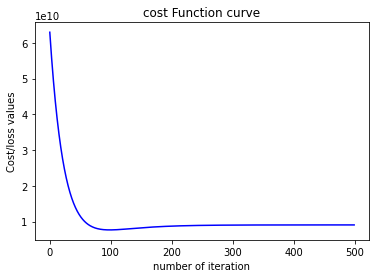

In [61]:
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],Y,0.01,500)

In [62]:
dataset.head()

,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [63]:
theta_array

[array([-67771.03783011]), array([461049.62963397]), 0.0]

In [64]:
print(hypothesis(theta_array,2,1416))

[854328.22143784]
